In [2]:
!pip install torch-lr-finder
!pip install torchsummary
!pip install lightning-bolts

  Using cached lightning_bolts-0.7.0-py3-none-any.whl (300 kB)
  Using cached pytorch_lightning-1.9.5-py3-none-any.whl (829 kB)
  Using cached torchmetrics-1.2.0-py3-none-any.whl (805 kB)
  Using cached lightning_utilities-0.9.0-py3-none-any.whl (23 kB)


In [3]:
import torch
import torchvision
from torchvision import transforms as T
train_data = torchvision.datasets.MNIST(root='../data', train=True, download=True, transform=T.ToTensor())

4

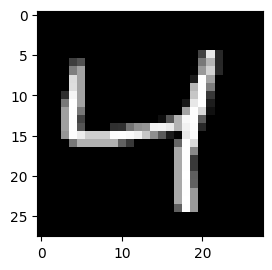

In [5]:
import numpy as np
data, label = train_data[2]
data = torch.stack([data.squeeze(0), data.squeeze(0), data.squeeze(0)], dim=0)

import matplotlib.pyplot as plt
plt.subplot(1, 2, 1)
#img = np.array(data.permute(1,2,0), np.int16)
plt.imshow(data.permute(1,2,0))
label

In [6]:
from dataset.MNIST import get_dataloader

batch_size = 256

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 4, 'pin_memory': True}
train_dataloader, test_dataloader = get_dataloader(**kwargs)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [7]:
from main import init
from models.VAE import VAE
from config import vae_config as cfg

        #enc_out_dim=512, latent_dim=256, input_height=28, num_embed=10
model = VAE(
          enc_out_dim=cfg['enc_out_dim'],
          latent_dim=cfg['latent_dim'],
          num_embed=cfg['num_classes'],
          input_height=cfg['image_size'])
model = init(train_dataloader, test_dataloader,model,cfg, in_channels=3, out_channels=3, show_summary=False, accelerator='gpu')

/usr/local/lib/python3.10/dist-packages/pl_bolts/models/self_supervised/amdim/amdim_module.py:34: UnderReviewWarning: The feature generate_power_seq is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  "lr_options": generate_power_seq(LEARNING_RATE_CIFAR, 11),
/usr/local/lib/python3.10/dist-packages/pl_bolts/models/self_supervised/amdim/amdim_module.py:92: UnderReviewWarning: The feature FeatureMapContrastiveTask is currently marked under review. The compatibility with other Lightning projects is not guaranteed and API may change at any time. The API and functionality may change without warning in future releases. More details: https://lightning-bolts.readthedocs.io/en/latest/stability.html
  contrastive_task: Union[FeatureMapContrastiveTask] = FeatureMapCon

Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/data_connector.py:488: PossibleUserWarning: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test/predict dataloaders.
  rank_zero_warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch  0
Train Loss:  4338.2333984375
Val Loss:  3695.6982421875


Validation: 0it [00:00, ?it/s]

Epoch  1
Train Loss:  3584.0322265625
Val Loss:  3493.22314453125


Validation: 0it [00:00, ?it/s]

Epoch  2
Train Loss:  3420.442626953125
Val Loss:  3353.46728515625


Validation: 0it [00:00, ?it/s]

Epoch  3
Train Loss:  3311.287841796875
Val Loss:  3266.262451171875


Validation: 0it [00:00, ?it/s]

Epoch  4
Train Loss:  3238.250732421875
Val Loss:  3200.45263671875


Validation: 0it [00:00, ?it/s]

Epoch  5
Train Loss:  3184.343017578125
Val Loss:  3159.07080078125


Validation: 0it [00:00, ?it/s]

Epoch  6
Train Loss:  3144.289794921875
Val Loss:  3119.613525390625


Validation: 0it [00:00, ?it/s]

Epoch  7
Train Loss:  3112.061767578125
Val Loss:  3090.404541015625


Validation: 0it [00:00, ?it/s]

Epoch  8
Train Loss:  3085.99609375
Val Loss:  3068.654541015625


Validation: 0it [00:00, ?it/s]

Epoch  9
Train Loss:  3063.714111328125
Val Loss:  3050.071533203125


Validation: 0it [00:00, ?it/s]

Epoch  10
Train Loss:  3043.17578125
Val Loss:  3028.111572265625


Validation: 0it [00:00, ?it/s]

Epoch  11
Train Loss:  3026.00048828125
Val Loss:  3015.209716796875


Validation: 0it [00:00, ?it/s]

Epoch  12
Train Loss:  3009.426025390625
Val Loss:  3000.0087890625


Validation: 0it [00:00, ?it/s]

Epoch  13
Train Loss:  2994.812744140625
Val Loss:  2987.32177734375


Validation: 0it [00:00, ?it/s]

Epoch  14
Train Loss:  2980.221923828125
Val Loss:  2972.18310546875


Validation: 0it [00:00, ?it/s]

Epoch  15
Train Loss:  2966.56982421875
Val Loss:  2956.776123046875


Validation: 0it [00:00, ?it/s]

Epoch  16
Train Loss:  2953.303466796875
Val Loss:  2944.7890625


Validation: 0it [00:00, ?it/s]

Epoch  17
Train Loss:  2940.31689453125
Val Loss:  2930.719482421875


Validation: 0it [00:00, ?it/s]

Epoch  18
Train Loss:  2926.958251953125
Val Loss:  2917.6630859375


Validation: 0it [00:00, ?it/s]

Epoch  19
Train Loss:  2914.64697265625
Val Loss:  2907.48046875


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


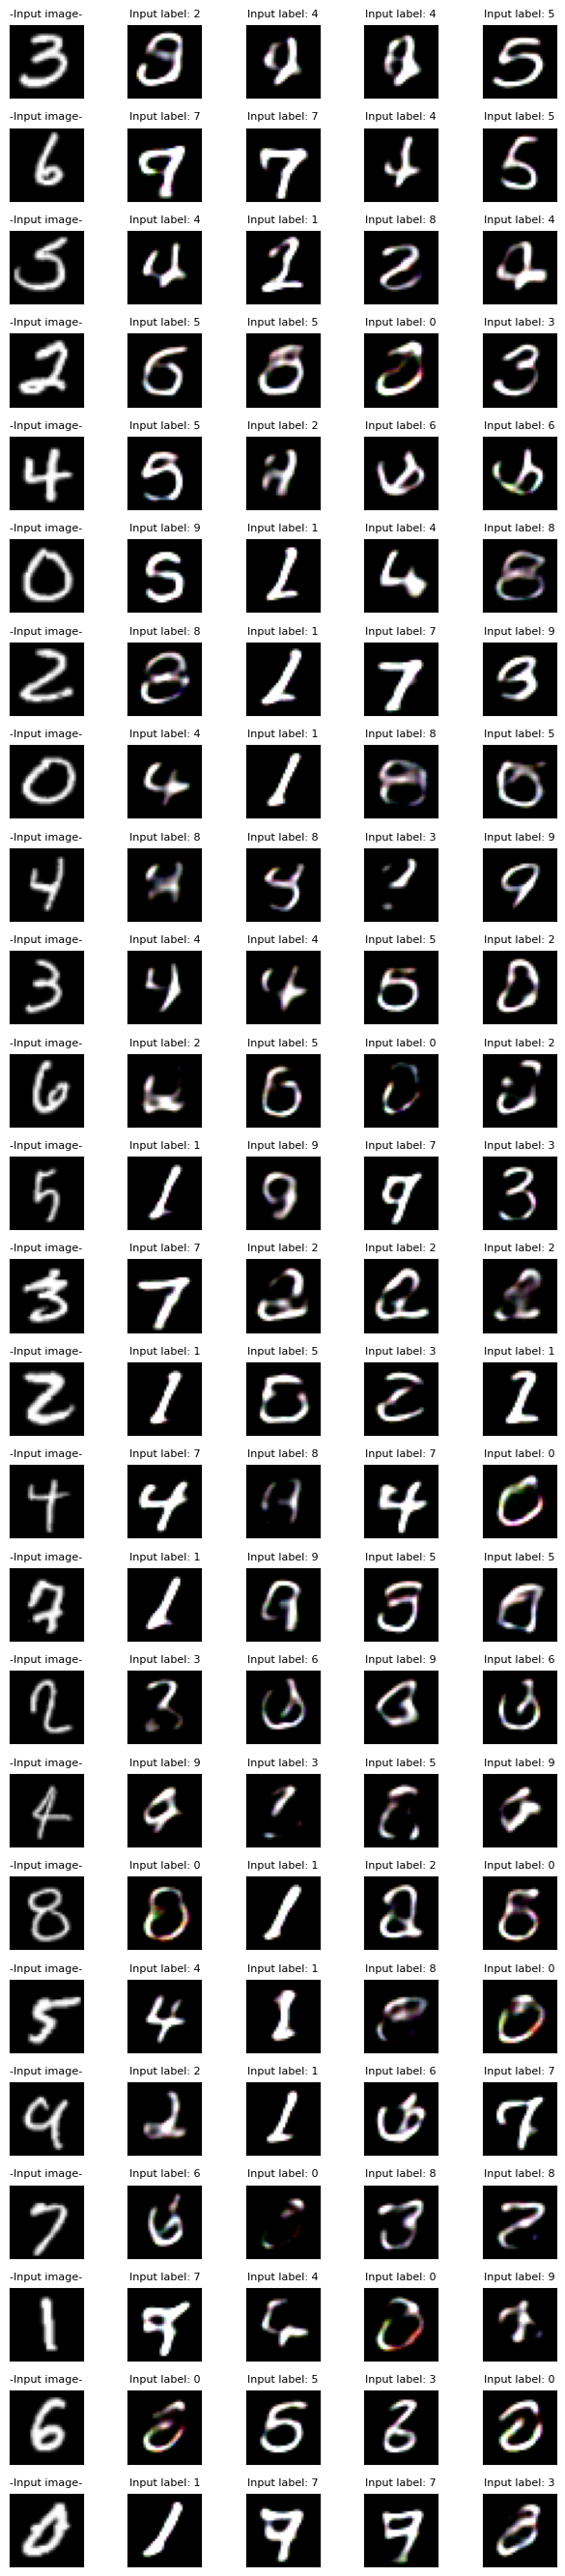

In [10]:
from utils import device, plot_vae_images
from config import vae_config
import random
import torch
from torchvision import transforms as T

from dataset.MNIST import MultiChannelMNIST
import matplotlib.pyplot as plt
import numpy as np

def plot_vae_images(input_imgs, input_labels, pred_imgs):
    cols = 5
    rows = 25

    plt.figure(figsize = (6,27))
    c = 1
    for i in range(1, rows + 1):
        for j in range(1, cols + 1):
            if j == 1:
                plt.subplot(rows, cols, c)
                plt.tight_layout()
                plt.imshow(input_imgs[i - 1].cpu().permute(1, 2, 0), aspect='auto')
                plt.title('-Input image-', fontsize=8)
                plt.xticks([])
                plt.yticks([])

            else:
                plt.subplot(rows, cols, c)
                plt.tight_layout()
                plt.imshow(pred_imgs[i - 1][j - 2].detach().cpu().permute(1, 2, 0), aspect='auto')
                plt.title('Input label: ' + str(input_labels[i - 1][j - 2]), fontsize=8)
                #plt.title(str(input_labels[i - 1][j - 2]), fontsize=8)
                plt.xticks([])
                plt.yticks([])

            c += 1

    plt.show()

def validate_vae(net, count=40):
    cfg = vae_config
    image_transform = T.Compose(
        [
            T.Resize((cfg['image_size'], cfg['image_size'])),
            T.ToTensor()
        ]
    )

    test_data = MultiChannelMNIST(root='../data', train=False, download=True, transform=image_transform)
    input_images = []
    input_labels = []
    random_25_samples = random.sample(list(test_data), 25)
    for data, label in random_25_samples:
        i_label = []
        input_images.append(data)
        for k in range(count // 10):
            temp = random.randint(0, 9)
            if temp == label:
                temp += random.choice([-1, 1])

            i_label.append(temp)
        input_labels.append(i_label)


    net.eval()
    pred_images = []
    for i in range(25):
        p_imgs = []
        for j in range( len(input_labels[i]) ):
            x = input_images[i].unsqueeze(0), torch.tensor(input_labels[i][j]).unsqueeze(0)
            #print(input_labels[i])
            try:
              x_hat = net(x)
            except:
              continue
            p_imgs.append(x_hat.squeeze(0))

        pred_images.append( p_imgs )

    plot_vae_images(input_images, input_labels, pred_images)

validate_vae(model)